In [1]:
from sklearn.linear_model import Ridge,Lasso,LinearRegression
from sklearn.datasets import load_diabetes
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# from scipy import stats as st
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error as mse, mean_absolute_error as mae,r2_score






In [2]:
d=load_diabetes()
d

{'data': array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
          0.01990749, -0.01764613],
        [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
         -0.06833155, -0.09220405],
        [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
          0.00286131, -0.02593034],
        ...,
        [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
         -0.04688253,  0.01549073],
        [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
          0.04452873, -0.02593034],
        [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
         -0.00422151,  0.00306441]]),
 'target': array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
         69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
         68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
         87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
        259.,  53., 190., 142.,  75., 142., 155., 225.,  59

In [8]:
df = pd.DataFrame(d['data'],columns=d['feature_names'])
df['diabetes'] =d['target']

In [6]:
d['feature_names']

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']

In [7]:
pd.DataFrame(d['data'],columns=d['feature_names'])

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641
...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018114,0.044485
439,0.041708,0.050680,-0.015906,0.017293,-0.037344,-0.013840,-0.024993,-0.011080,-0.046883,0.015491
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044529,-0.025930


In [8]:
df=pd.DataFrame(d['data'],columns=d['feature_names'])
df

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641
...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018114,0.044485
439,0.041708,0.050680,-0.015906,0.017293,-0.037344,-0.013840,-0.024993,-0.011080,-0.046883,0.015491
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044529,-0.025930


In [9]:
df['target']=d['target']
df

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0
...,...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207,178.0
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018114,0.044485,104.0
439,0.041708,0.050680,-0.015906,0.017293,-0.037344,-0.013840,-0.024993,-0.011080,-0.046883,0.015491,132.0
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044529,-0.025930,220.0


In [53]:
print(d.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

:Number of Instances: 442

:Number of Attributes: First 10 columns are numeric predictive values

:Target: Column 11 is a quantitative measure of disease progression one year after baseline

:Attribute Information:
    - age     age in years
    - sex
    - bmi     body mass index
    - bp      average blood pressure
    - s1      tc, total serum cholesterol
    - s2      ldl, low-density lipoproteins
    - s3      hdl, high-density lipoproteins
    - s4      tch, total cholesterol / HDL
    - s5      ltg, possibly log of serum triglycerides level
    - s6      glu, blood sugar level

Note: Each of these 10 feature variables have bee

In [55]:
d.data.shape

(442, 10)

In [7]:
d.target

array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
        69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
        68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
        87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
       259.,  53., 190., 142.,  75., 142., 155., 225.,  59., 104., 182.,
       128.,  52.,  37., 170., 170.,  61., 144.,  52., 128.,  71., 163.,
       150.,  97., 160., 178.,  48., 270., 202., 111.,  85.,  42., 170.,
       200., 252., 113., 143.,  51.,  52., 210.,  65., 141.,  55., 134.,
        42., 111.,  98., 164.,  48.,  96.,  90., 162., 150., 279.,  92.,
        83., 128., 102., 302., 198.,  95.,  53., 134., 144., 232.,  81.,
       104.,  59., 246., 297., 258., 229., 275., 281., 179., 200., 200.,
       173., 180.,  84., 121., 161.,  99., 109., 115., 268., 274., 158.,
       107.,  83., 103., 272.,  85., 280., 336., 281., 118., 317., 235.,
        60., 174., 259., 178., 128.,  96., 126., 28

In [59]:
d.feature_names

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']

In [61]:
d.data

array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
         0.01990749, -0.01764613],
       [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
        -0.06833155, -0.09220405],
       [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
         0.00286131, -0.02593034],
       ...,
       [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
        -0.04688253,  0.01549073],
       [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
         0.04452873, -0.02593034],
       [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
        -0.00422151,  0.00306441]])

In [11]:
df=pd.DataFrame(d.data,columns=d.feature_names)
df["diabetes"]=d.target
df.head(2)

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,diabetes
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0


In [65]:
df.isnull().sum().sum()

0

In [67]:
df.dtypes

age         float64
sex         float64
bmi         float64
bp          float64
s1          float64
s2          float64
s3          float64
s4          float64
s5          float64
s6          float64
diabetes    float64
dtype: object

# seggregation of x and y

In [13]:
df

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,diabetes
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0
...,...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207,178.0
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018114,0.044485,104.0
439,0.041708,0.050680,-0.015906,0.017293,-0.037344,-0.013840,-0.024993,-0.011080,-0.046883,0.015491,132.0
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044529,-0.025930,220.0


In [14]:
x=df.drop(columns=["diabetes"])
y=df["diabetes"]

In [17]:
# x

In [15]:
y

0      151.0
1       75.0
2      141.0
3      206.0
4      135.0
       ...  
437    178.0
438    104.0
439    132.0
440    220.0
441     57.0
Name: diabetes, Length: 442, dtype: float64

# train test split

In [18]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=1)

In [14]:
print(x_train.shape)
print(y_train.shape)

(353, 10)
(353,)


In [15]:
print(x_test.shape)
print(y_test.shape)

(89, 10)
(89,)


In [19]:
lr=LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [20]:
o=lr.coef_
o

array([ -30.62219046, -272.2506057 ,  528.85252681,  327.69716891,
       -581.01973841,  332.97061365,  -27.97314298,  139.28036115,
        665.07667773,   61.90517166])

In [21]:
lr.intercept_

151.4300932966009

In [23]:
y_pred=lr.predict(x_test)
r2_score(y_test,y_pred)

0.4384316213369278

In [24]:
y_pred_train=lr.predict(x_train)
r2_score(y_train,y_pred_train)

0.533228363691215

In [25]:
lr_error=mse(y_train,y_pred_train)
lr_error

2835.0372206252887

In [26]:
lr.coef_

array([ -30.62219046, -272.2506057 ,  528.85252681,  327.69716891,
       -581.01973841,  332.97061365,  -27.97314298,  139.28036115,
        665.07667773,   61.90517166])

In [35]:
r = Ridge(alpha=3)
r.fit(x_train,y_train)
print(r.coef_)
mse(y_train,r.predict(x_train))

[ 32.78938031 -21.85191682 161.06685861 110.33813391  24.28211424
   8.11109156 -93.70462137  85.41837404 141.5230249   81.56602451]


4071.4382980321034

In [34]:
rd=Ridge(alpha=50)
rd.fit(x_train,y_train)
print(rd.coef_)
r_pred_train=rd.predict(x_train)
print(mse(y_train,r_pred_train))

[ 4.89149433  0.44076285 15.25674392 11.21497541  4.79865512  3.54091117
 -9.96450635 10.61274782 14.50631364  9.78600081]
5800.894603886338


In [30]:
ri=Ridge(alpha=6)
ri.fit(x_train,y_train)
m=ri.coef_
print(m)
y_pred_train=ri.predict(x_train)
error=mse(y_train,y_pred_train)
print(error)

[ 25.12344675  -6.33932085  98.91106059  69.88304342  21.54234169
  12.35963099 -60.60296416  59.31999397  89.79308634  55.96973604]
4646.331673989317


In [ ]:
[ -30.62219046, -272.2506057 ,  528.85252681,  327.69716891,
       -581.01973841,  332.97061365,  -27.97314298,  139.28036115,
        665.07667773,   61.90517166]

In [25]:
r=Ridge(alpha=2)
r.fit(x_train,y_train)
print('coef',r.coef_)
y_pred_train=r.predict(x_train)
lr_error=mse(y_train,y_pred_train)
print('errpr',lr_error)

coef [  34.56558284  -38.39047988  205.71514873  137.86232842   22.0228002
    0.35538563 -115.19533769   99.42420543  177.00097889   95.22882026]
errpr 3760.4716596816415


In [ ]:
[ -30.62219046, -272.2506057 ,  528.85252681,  327.69716891,
       -581.01973841,  332.97061365,  -27.97314298,  139.28036115,
        665.07667773,   61.90517166])

so value of coeffiecients are found to be very high so this makes model complex which creates the overfitting situation 
and also the accuracy on train and test shows the situatoon of high bias and hig varaince 

- high variance is because of high values of coeffiecents
- high bias is the irreduible error which we get throghh data and model 
so we can not control this hiigh bias we would handle overfitting situation using regularizatioon tehnique 

In [50]:
r=Ridge(alpha=1)
r.fit(x_train,y_train)
print(r.coef_)
y_pred_train1=r.predict(x_train)
r_error=mse(y_train,y_pred_train1)
print('r error',r_error)
print('-'*90)
print(o)
print('Erroe',lr_error)

[  30.19981099  -80.82971861  290.03134528  186.97053338   10.52007866
  -21.99921707 -151.22058789  116.91058436  241.96391279  110.24829294]
r error 3334.206989897002
------------------------------------------------------------------------------------------
[ -30.62219046 -272.2506057   528.85252681  327.69716891 -581.01973841
  332.97061365  -27.97314298  139.28036115  665.07667773   61.90517166]
Erroe 2835.0372206252887


In [99]:
r=Ridge(alpha=1)
r.fit(x_train,y_train)
print(r.coef_)
print(r.intercept_)


[  30.19981099  -80.82971861  290.03134528  186.97053338   10.52007866
  -21.99921707 -151.22058789  116.91058436  241.96391279  110.24829294]
152.05358265576848


In [45]:
df.columns

Index(['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6',
       'diabetes'],
      dtype='object')

[57.20276957976651, 59.683593951926035, 61.528384285596736, 64.05249644485737, 67.29229186784325, 68.85143378654625, 69.7660275592268, 71.70505804791851]


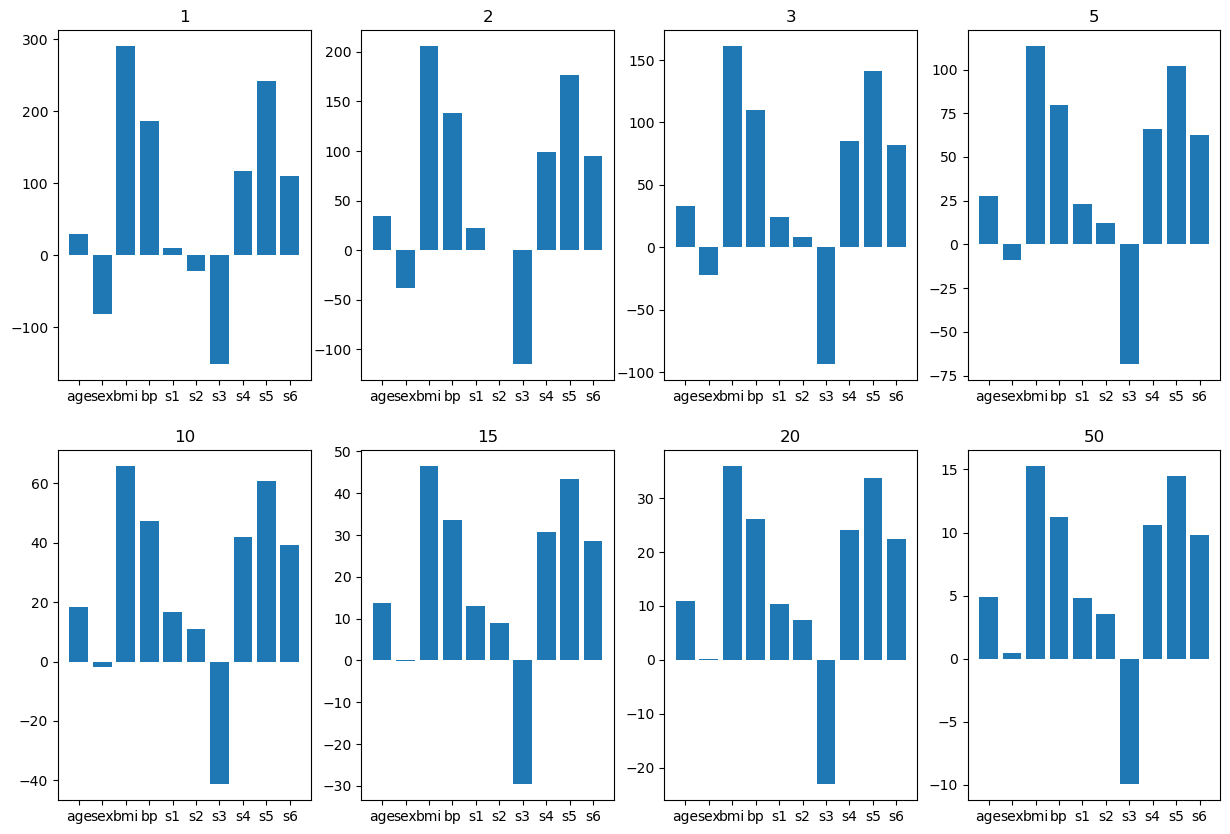

In [47]:
a=[1,2,3,5,10,15,20,50]
error=[]
#d={}
pos=1
plt.figure(figsize=(15,10))
for i in a:
    r=Ridge(alpha=i)
    r.fit(x_train,y_train)
    #print(r.coef_)
    #print(r.intercept_)
    y_pred=r.predict(x_test)
    rmse=np.sqrt(mse(y_test,y_pred))
    error.append(rmse)
    #d[i]=r.coef_
    plt.subplot(2,4,pos)
    plt.bar(x.columns,r.coef_)
    plt.title(i)
    pos=pos+1
print(error)


[55.0655617246501, 55.19365546123485, 60.21102348608241, 70.46358783356774, 73.26046048581938, 73.26046048581938, 73.26046048581938, 73.26046048581938]


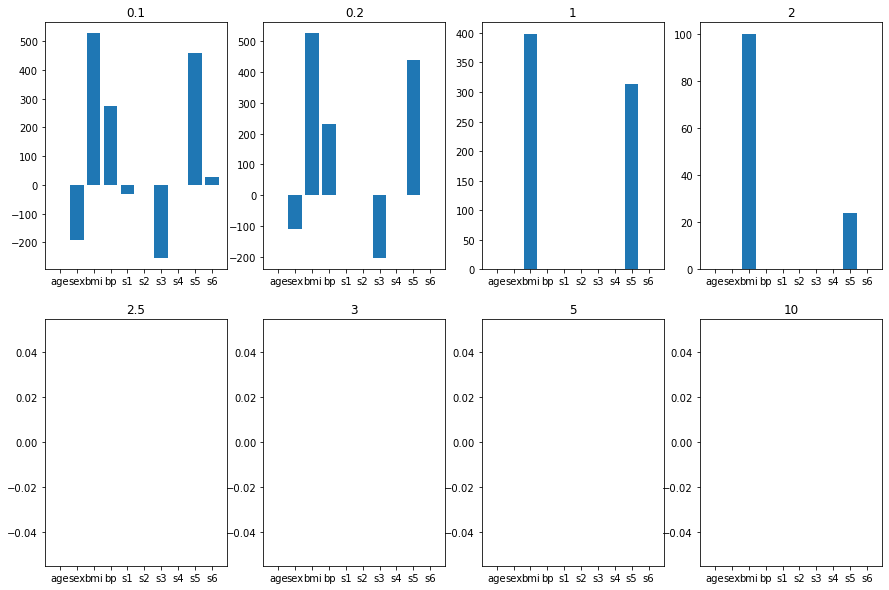

In [39]:
a=[0.1,0.2,1,2,2.5,3,5,10]
error=[]
#d={}
pos=1
plt.figure(figsize=(15,10))
for i in a:
    r=Lasso(alpha=i)
    r.fit(x_train,y_train)
    #print(r.coef_)
    #print(r.intercept_)
    y_pred=r.predict(x_test)
    rmse=np.sqrt(mse(y_test,y_pred))
    error.append(rmse)
    #d[i]=r.coef_
    plt.subplot(2,4,pos)
    plt.bar(x.columns,r.coef_)
    plt.title(i)
    pos=pos+1
print(error)
